In [17]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

for mu in [0.01,0.001,0.0001]:
    for gap in [5,10,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        column_mean = defaultdict(list)
        for column_name in column_names:
            
            csv_files = glob.glob(directory_path + '*.csv')

            dfs = []

            for file in csv_files:
                df = pd.read_csv(file)
                dfs.append(df[column_name])

            concatenated_df = pd.concat(dfs, axis=1)
            for i in range(0,10000):
                column_mean[column_name].append(concatenated_df.iloc[i].mean())
            
        dfmean = pd.DataFrame(column_mean)
        dfmean.to_csv(directory_path+'meandata.csv')

In [2]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

for mu in [0.01,0.001,0.0001]:
    for gap in [5,25,45,60,100]:
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        column_mean = defaultdict(list)
        for column_name in column_names:
            
            csv_files = glob.glob(directory_path + '*.csv')

            dfs = []

            for file in csv_files:
                df = pd.read_csv(file)
                dfs.append(df[column_name])

            concatenated_df = pd.concat(dfs, axis=1)
            for i in range(0,10000):
                column_mean[column_name].append(concatenated_df.iloc[i].mean())
            
        dfmean = pd.DataFrame(column_mean)
        dfmean.to_csv(directory_path+'meandata.csv')

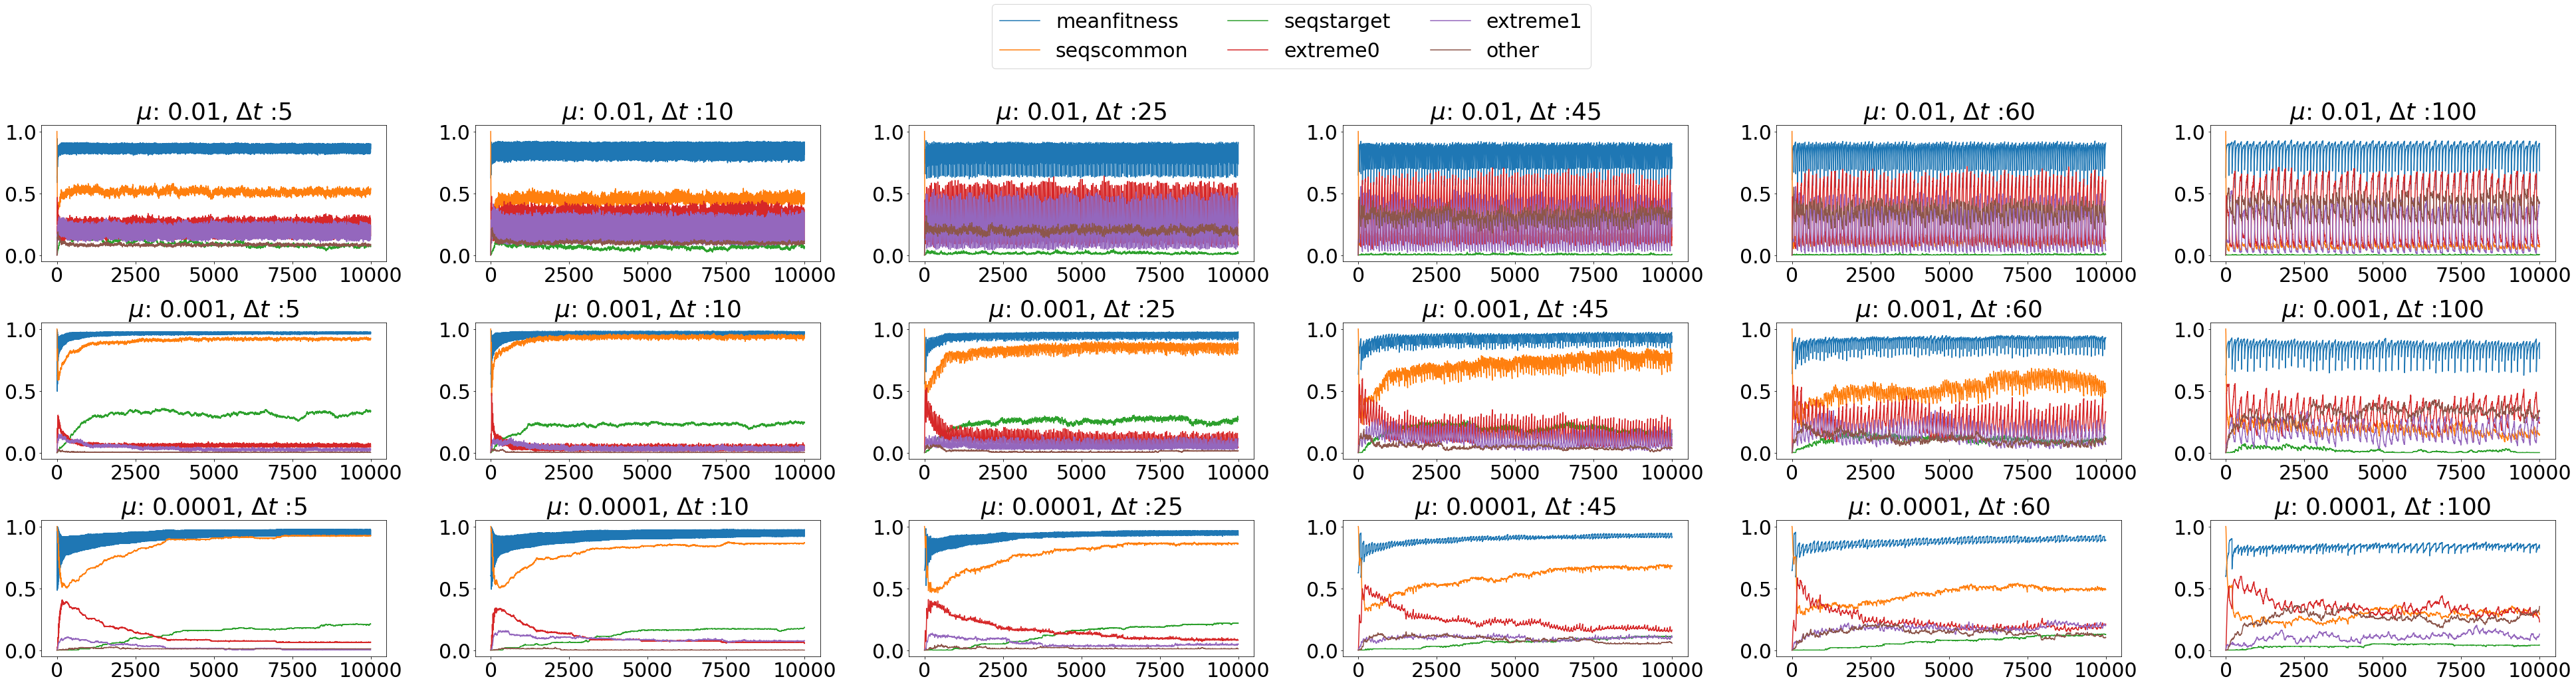

In [53]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 6,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,10,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption1_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,5].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn.png',bbox_inches='tight')

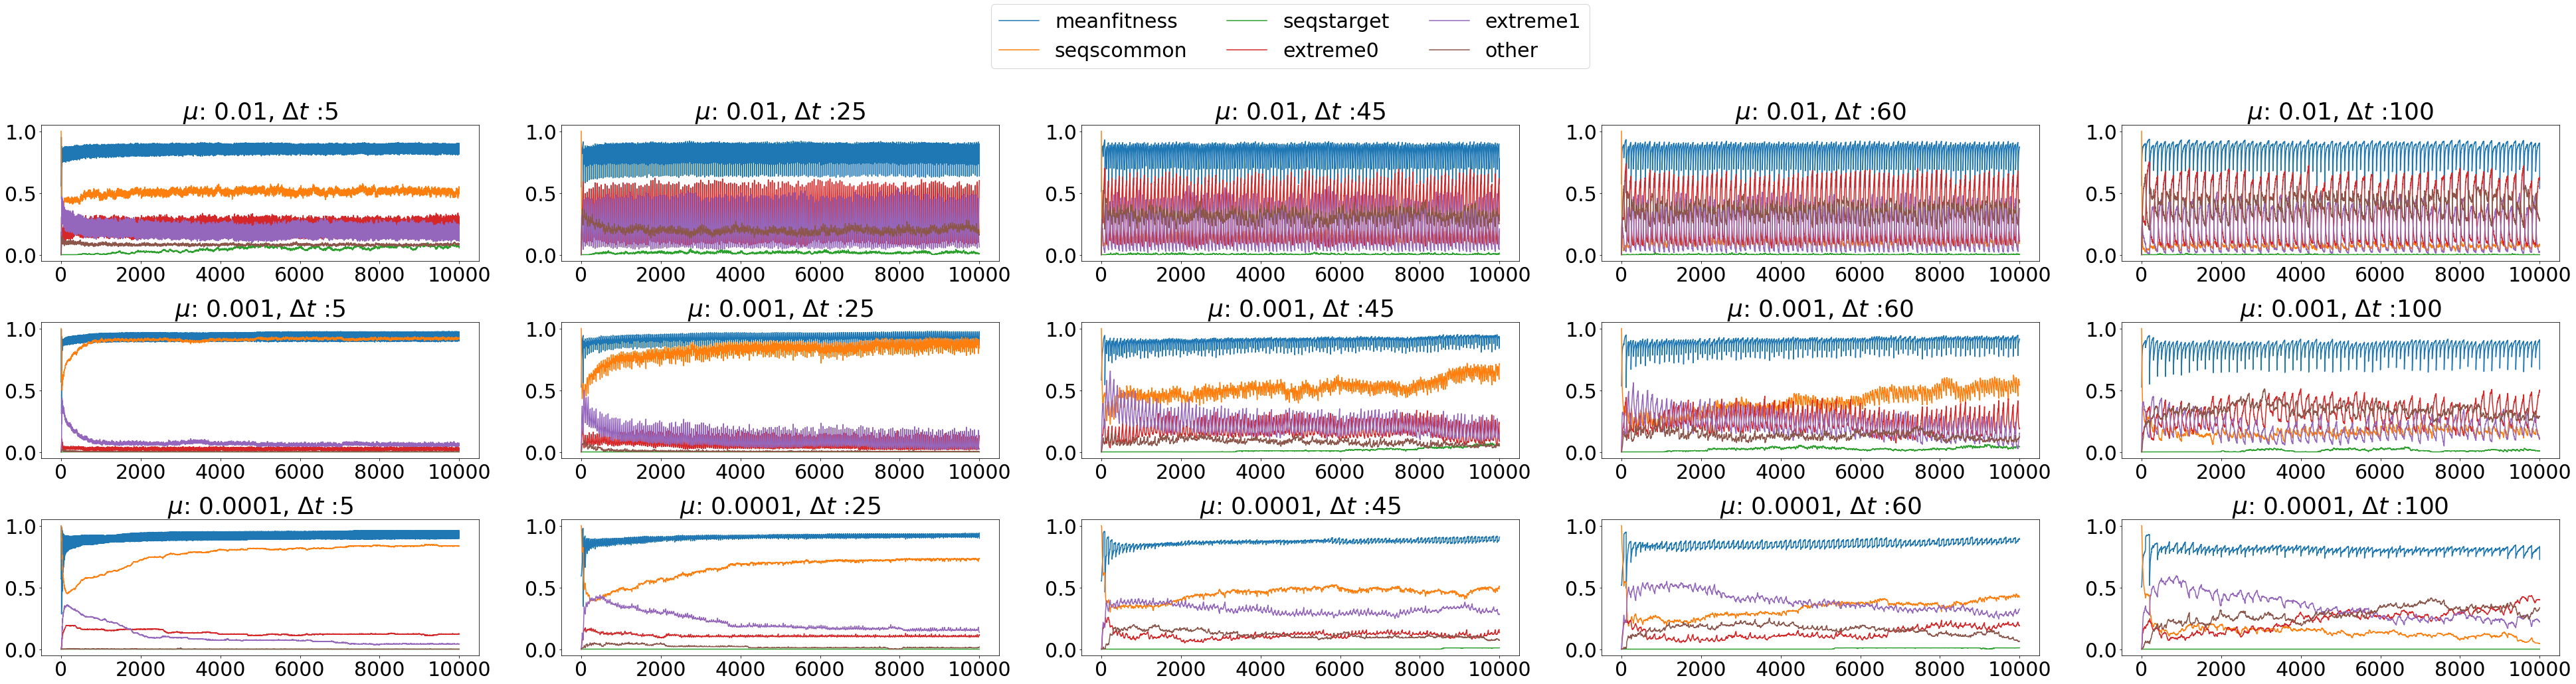

In [6]:
import pandas as pd
import glob
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
#mpl.rcParams['agg.path.chunksize'] = 10000
fig, ax = plt.subplots(3, 5,figsize=(55,13))
plt.rcParams.update({'font.size':30})
fig.tight_layout(pad = 1.5)
countrow = -1
# Path to the directory containing your CSV files
for mu in [0.01,0.001,0.0001]:
    countrow+=1
    countcol = -1
    for gap in [5,25,45,60,100]:
        countcol+=1
        directory_path = '../data/fitlands2_initoption0_extremeoption0_samplenum10_plasticoption0_gengap'+str(gap)+'_mu'+str(mu)+'_generations10000_Npop100/'
        df = pd.read_csv(directory_path + 'meandata.csv')

        # Define the column for which you want to calculate the mean
        column_names = ['meanfitness', 'seqscommon', 'seqstarget','extreme0', 'extreme1', 'other']
        
        for column_name in column_names:
            ax[countrow,countcol].plot(np.arange(1,10001),df[column_name][0:10000], label=column_name)
            ax[countrow,countcol].set_title(r'$\mu$: ' + str(mu) + r', $\Delta t$ :' + str(gap))
            
handles, labels = ax[2,4].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center',bbox_to_anchor = (0, 0.15, 1, 1),ncol=3,bbox_transform = plt.gcf().transFigure)
fig.savefig('seqsevodyn0.png',bbox_inches='tight')